In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..\..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import select_sc19
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.roles import Roles
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions, MissionStatus
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties, PlotLabelStyle
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import (mission_completion_query,
     mission_completion,
    _mission_completes_details)
from triple_agent.classes.action_tests import ActionTest
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import linregress

In [4]:
replays = get_parsed_replays(lambda g: True)

In [5]:
EVENT_ORDER = ['Summer Cup 2018', 'SCL4', 'Winter Cup 2019', 'SCL5', 'Summer Cup 2019', 'Spooky Invitational', 'Winter Cup 2020']

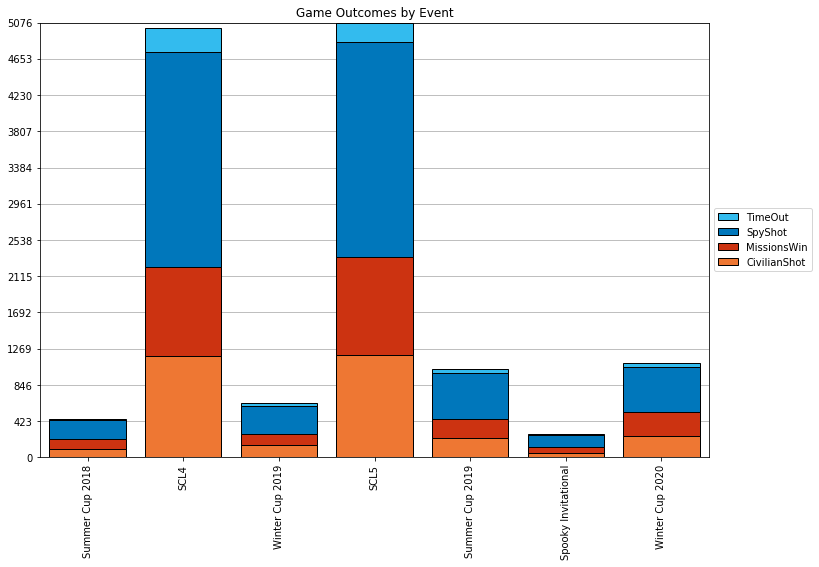

,Summer Cup 2018,SCL4,Winter Cup 2019,SCL5,Summer Cup 2019,Spooky Invitational,Winter Cup 2020
WinType.TimeOut,12,282,39,230,57,12,46
WinType.SpyShot,218,2507,323,2508,537,141,528
WinType.MissionsWin,127,1043,133,1145,221,68,273
WinType.CivilianShot,93,1182,144,1192,222,57,255


In [6]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.event,
        secondary_order=EVENT_ORDER,
    ),
    axis_properties=AxisProperties(title="Game Outcomes by Event")
).frame

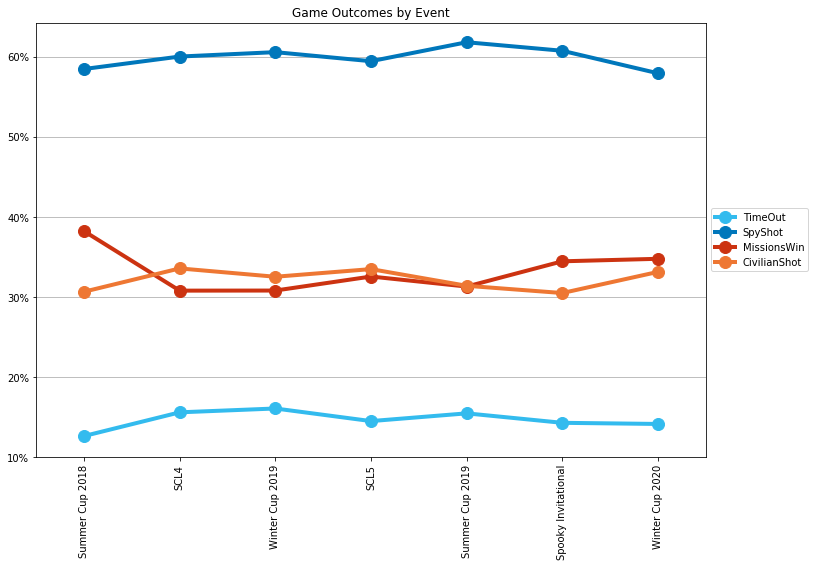

,Summer Cup 2018,SCL4,Winter Cup 2019,SCL5,Summer Cup 2019,Spooky Invitational,Winter Cup 2020
WinType.TimeOut,0.026667,0.056243,0.061033,0.045320,0.054966,0.043165,0.041742
WinType.SpyShot,0.484444,0.500000,0.505477,0.494187,0.517840,0.507194,0.479129
WinType.MissionsWin,0.282222,0.208018,0.208138,0.225616,0.213115,0.244604,0.247731
WinType.CivilianShot,0.206667,0.235740,0.225352,0.234877,0.214079,0.205036,0.231397


In [7]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.event,
        secondary_order=EVENT_ORDER,
        percent_normalized_data=True
    ),
    axis_properties=AxisProperties(
        title="Game Outcomes by Event",
        force_line=True,
    )
).frame

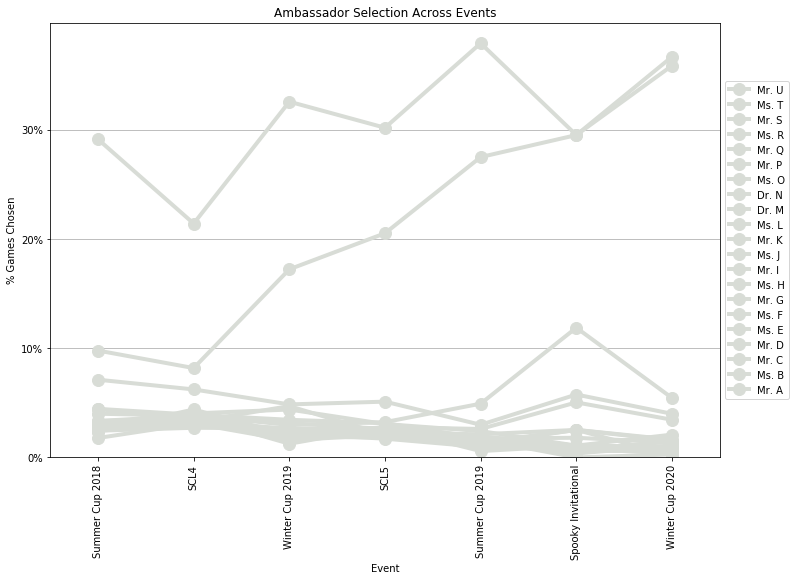

In [8]:
_=amba_selection(
    replays,
    axis_properties = AxisProperties(
        title="Ambassador Selection Across Events",
        y_axis_label="% Games Chosen",
        x_axis_label="Event",
        force_line=True,
        primary_color_dict=defaultdict(lambda: 'xkcd:light grey', {'Taft':'xkcd:brown', 'Carlos':'xkcd:pink', 'General':'xkcd:green', 'Disney':'black'})
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.event,
        secondary_order=EVENT_ORDER,
        percent_normalized_data=True,
        #primary_order = ['Taft', 'Carlos', 'General'],
    )
).frame